In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
boston.data.shape

(506, 13)

In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#Checking for null values
bos.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [6]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#Adding column names
bos.columns=boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#As we see target column MEDV is not present so adding it to dataset
bos['MEDV'] = boston.target

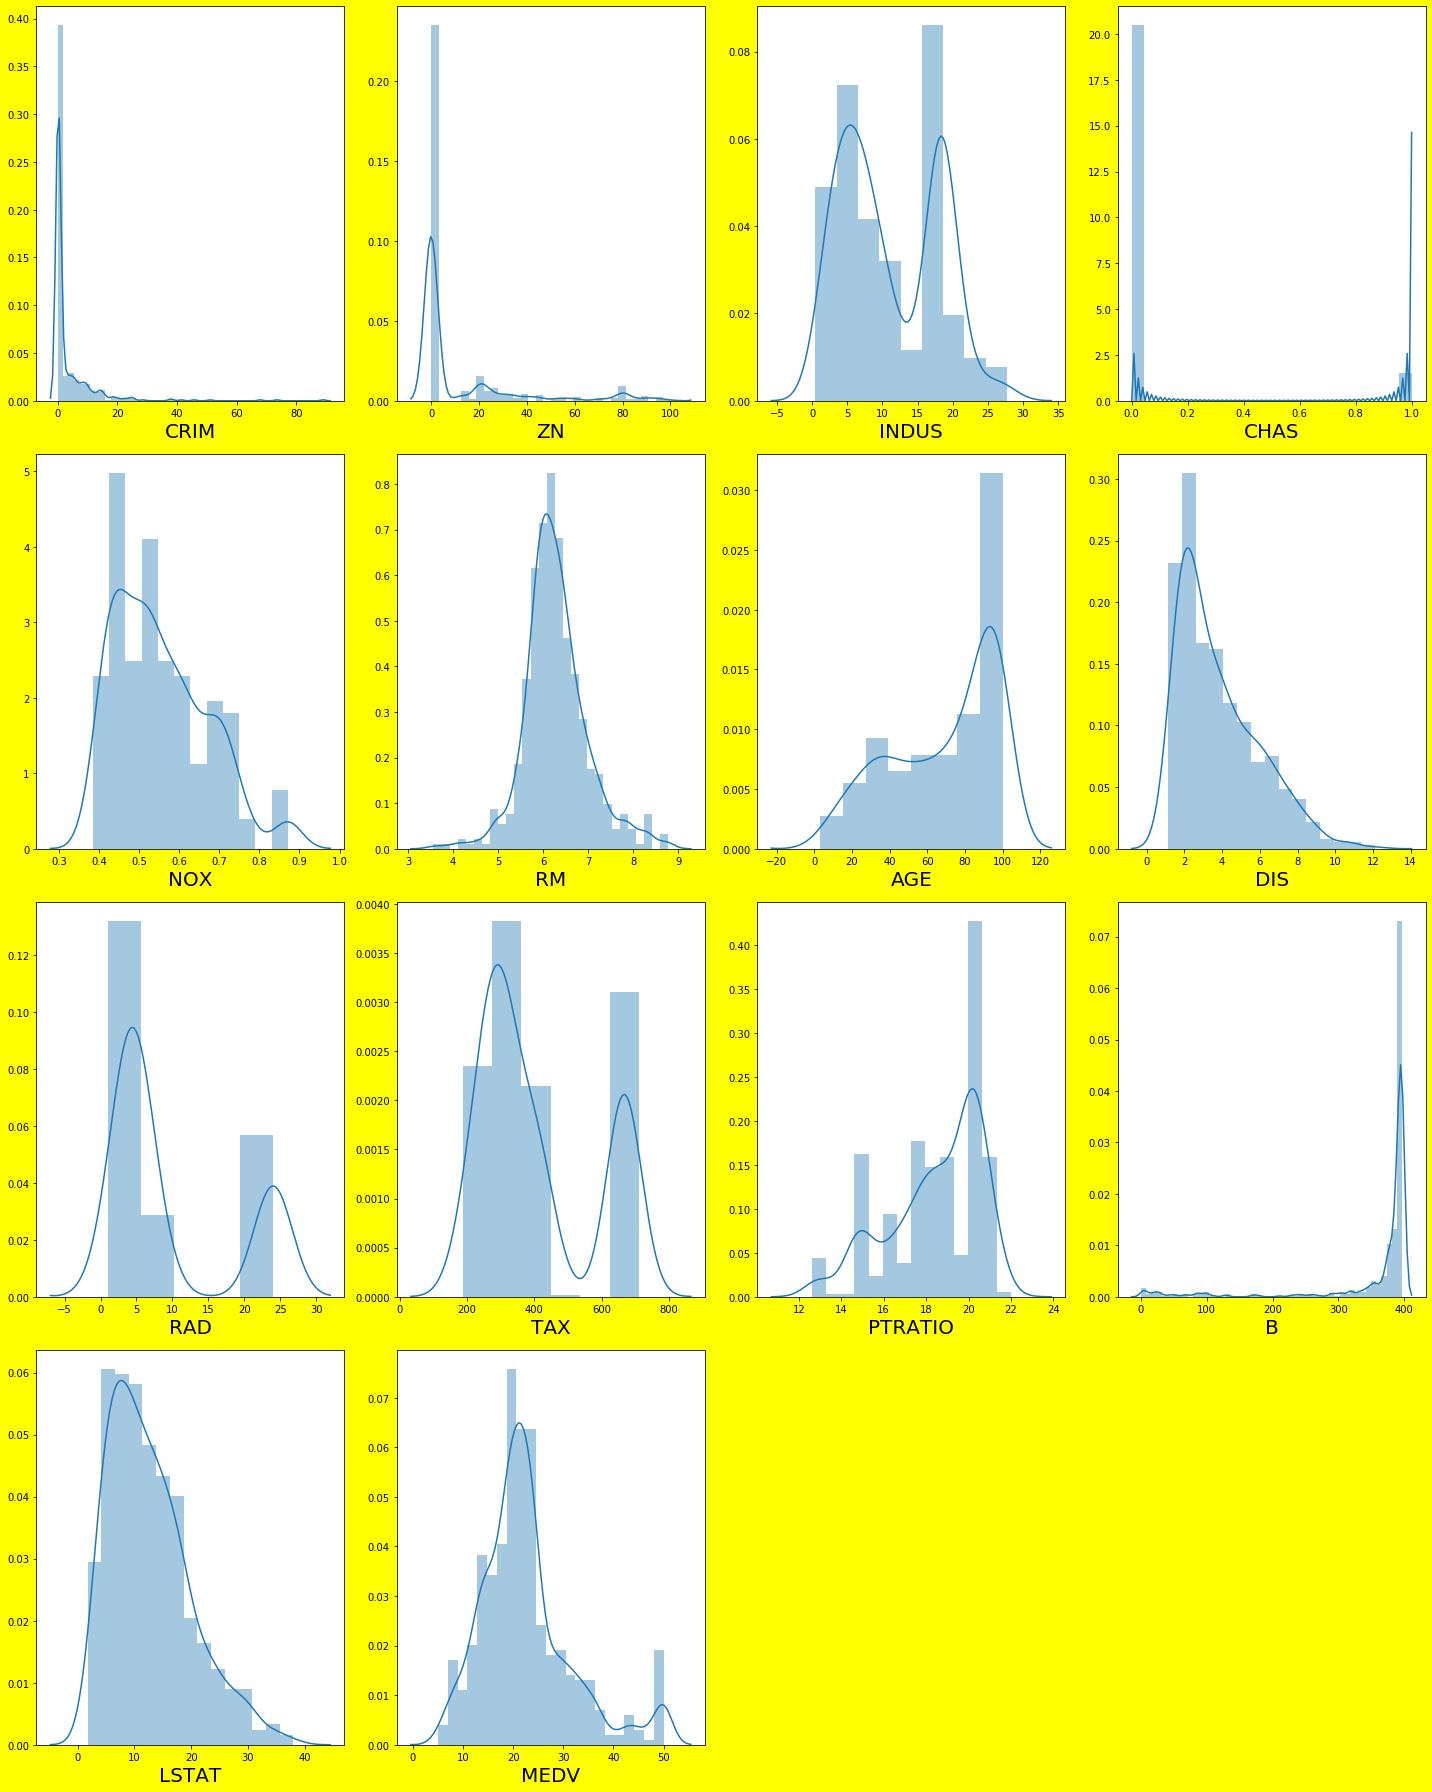

In [9]:
#Visualizing the data and analyzing the relationship between independent and dependent variables
plt.figure(figsize=(20,25), facecolor='Yellow')
plotnumber = 1

for column in bos:
    if plotnumber<=14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
#Since we observe there is skewness in some columns so removing by log transform method

In [11]:
def log_transform(data,col_name):
    for i in col_name:
        if 0 in data[i].values:
            data[i] = data[i].replace(0,0.00001)
            continue
        else:
            data[i] = np.log(data[i])
    return data

In [12]:
bos = log_transform(bos,['CRIM','ZN','CHAS','B','DIS'])

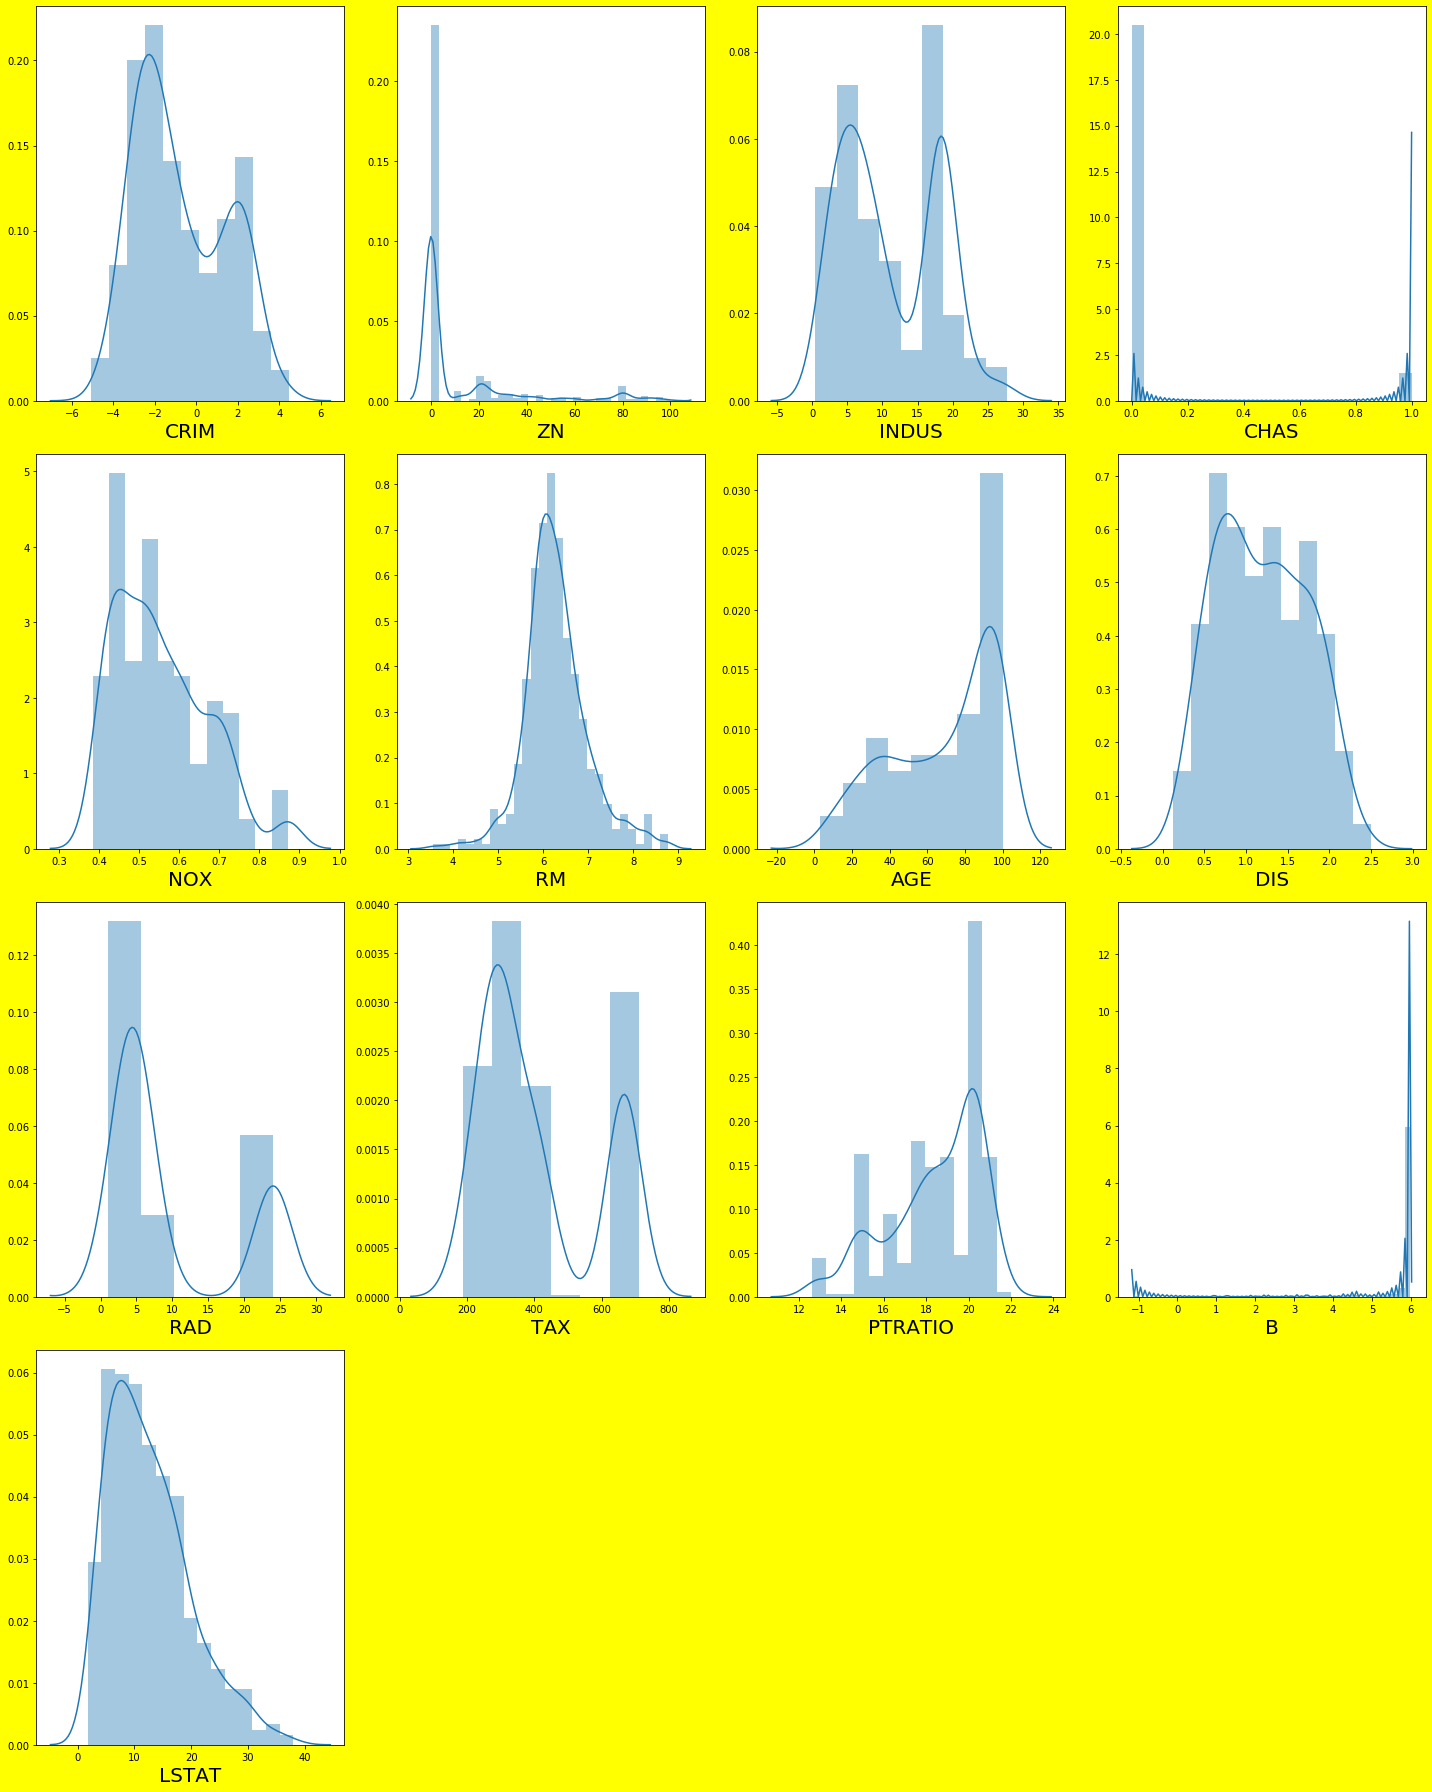

In [13]:
#Visualizing the data after removing skewness
plt.figure(figsize=(20,25), facecolor='Yellow')
plotnumber = 1

for column in bos:
    if plotnumber<=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [23]:
X = bos.drop(columns = ['MEDV'])
y = bos['MEDV']

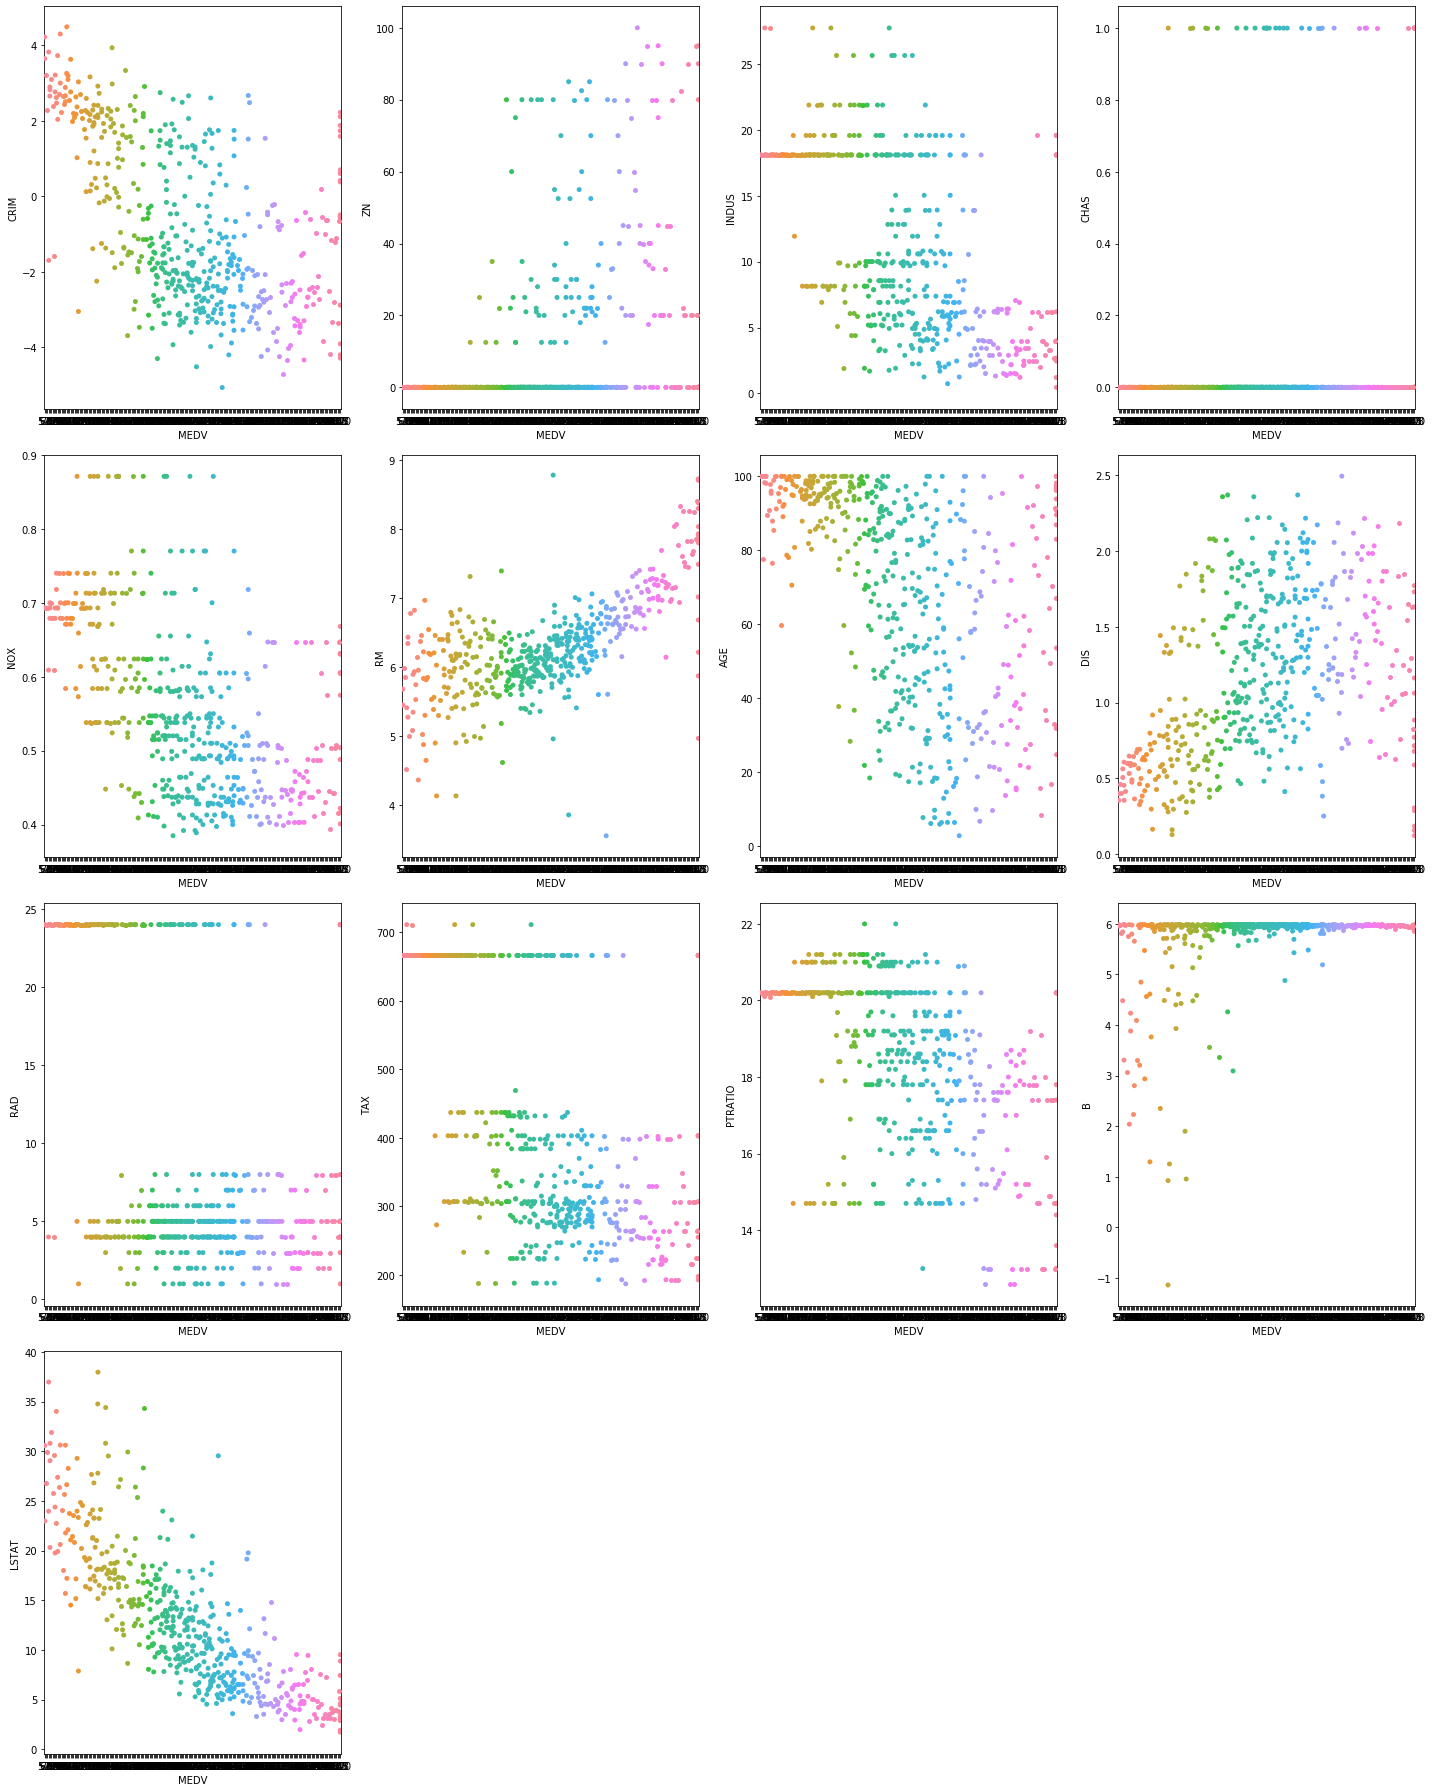

In [33]:
#Visualizing data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=13 :
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [34]:
#Scaling data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [35]:
X_scaled

array([[-1.98322812,  0.28482959, -1.2879095 , ..., -1.45900038,
         0.3025923 , -1.0755623 ],
       [-1.30563886, -0.48772233, -0.59338101, ..., -0.30309415,
         0.3025923 , -0.49243937],
       [-1.30597804, -0.48772233, -0.59338101, ..., -0.30309415,
         0.28925293, -1.2087274 ],
       ...,
       [-0.93540227, -0.48772233,  0.11573841, ...,  1.17646583,
         0.3025923 , -0.98304761],
       [-0.662329  , -0.48772233,  0.11573841, ...,  1.17646583,
         0.29129387, -0.86530163],
       [-1.05026732, -0.48772233,  0.11573841, ...,  1.17646583,
         0.3025923 , -0.66905833]])

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
#Checking multicollinearity
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,7.934424,CRIM
1,2.127945,ZN
2,4.064544,INDUS
3,1.070906,CHAS
4,4.918501,NOX
5,1.911608,RM
6,3.234029,AGE
7,4.786935,DIS
8,9.712331,RAD
9,9.009104,TAX


In [37]:
#For this dataset we can not do anything for vif need to learn PCA

In [41]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [42]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [44]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [45]:
regression.score(x_train,y_train)

0.7454030119659263

In [46]:
adj_r2(x_train,y_train)

0.7363351740359456

In [47]:
#r2 score is 74% and adj r2 is 73% for our training so looks like we are not being penalized by use of any feature

In [48]:
#Now let's check if our model is overfitting our data using regularization.

In [49]:
regression.score(x_test,y_test)

0.7492183820631281

In [50]:
adj_r2(x_test,y_test)

0.7203673994686206

In [51]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [52]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00033837642965584014

In [53]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00033837642965584014, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
lasso_reg.score(x_test, y_test)

0.7492209562475665

In [55]:
#r2_score for test data (74%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.